In [8]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics,tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, plot_roc_curve, roc_auc_score
from scikitplot.metrics import plot_lift_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_lift_curve
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def score(m, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred=m.predict(x_train)
        print('Train Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_train, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_train, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_train, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_train, pred)}")
    elif train == False:
        pred=m.predict(x_test)
        print('Test Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_test, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_test, pred)}")

# 確認模型建立所使用的自變數 X 與應變數 Y
- 類別型變數處理：One-Hot Encoding
- 資料集拆分
- 連續型變數處理：標準化(Standardization)或正規化(Normalization)
  當特徵不服從常態分佈，建議使用 MinMaxScaler 進行正規化是較合適的特徵縮放方法



In [24]:
# Import dataset
train = pd.read_csv('train_final.csv', index_col=0)
test = pd.read_csv('test.csv')
test.drop(columns='ID', axis=1, inplace=True)
# 物件轉換為類別變量
category_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 
                 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
for ｉ in train.columns:
    if i in category_cols: 
        train[ｉ] = train[ｉ].astype('int64')
        train[ｉ] = train[ｉ].astype('category')
        
for ｉ in test.columns:
    if i in category_cols[:-1]: 
        test[ｉ] = test[ｉ].astype('int64')
        test[ｉ] = test[ｉ].astype('category')
train
train.info()

test
test.info()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,2,3,11,3,7,2,0,0
1,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,9,1,10,0,8,2,0,0
2,9,301.000000,0,0.0,38,2621.621429,0.021212,0.044508,10.721172,0.0,8,1,10,0,14,2,0,0
3,2,13.333333,0,0.0,105,2062.443592,0.012205,0.020276,0.000000,0.6,2,5,10,0,7,2,0,0
4,0,0.000000,0,0.0,19,220.384849,0.010526,0.024642,0.000000,0.0,2,1,1,0,7,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8093,0,0.000000,0,0.0,4,81.000000,0.000000,0.050000,0.000000,0.4,2,1,1,5,7,2,0,0
8094,1,15.200000,2,62.6,84,4941.698611,0.017647,0.038706,0.000000,0.0,6,3,11,1,8,2,0,0
8095,0,0.000000,0,0.0,25,701.883333,0.000000,0.023333,0.000000,0.0,6,1,10,0,4,2,0,0
8096,9,183.785714,1,90.0,95,3346.501984,0.002118,0.018656,5.932009,0.0,8,5,10,5,4,2,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8098 entries, 0 to 8097
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           8098 non-null   int64   
 1   Administrative_Duration  8098 non-null   float64 
 2   Informational            8098 non-null   int64   
 3   Informational_Duration   8098 non-null   float64 
 4   ProductRelated           8098 non-null   int64   
 5   ProductRelated_Duration  8098 non-null   float64 
 6   BounceRates              8098 non-null   float64 
 7   ExitRates                8098 non-null   float64 
 8   PageValues               8098 non-null   float64 
 9   SpecialDay               8098 non-null   float64 
 10  Month                    8098 non-null   category
 11  OperatingSystems         8098 non-null   category
 12  Browser                  8098 non-null   category
 13  Region                   8098 non-null   category
 14  TrafficT

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,12,482.500000,0.020000,0.040000,0.000000,0.0,8,3,10,0,5,2,0
1,3,33.0,0,0.0,17,386.416667,0.000000,0.010000,0.000000,0.0,9,1,10,0,4,1,0
2,0,0.0,0,0.0,9,154.800000,0.018182,0.030303,20.749351,0.0,8,3,3,2,4,2,0
3,5,79.0,1,12.0,54,1603.333333,0.005085,0.025424,0.000000,0.4,2,1,10,1,7,2,0
4,2,17.0,1,105.0,9,148.250000,0.020000,0.022000,0.000000,0.0,1,5,10,0,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2,738.0,0,0.0,26,1840.666667,0.008000,0.042000,0.000000,0.0,2,1,10,3,14,2,0
896,0,0.0,2,26.5,149,6001.171475,0.004000,0.022011,0.000000,0.0,8,1,10,0,4,2,0
897,0,0.0,0,0.0,2,0.000000,0.200000,0.200000,0.000000,0.6,2,3,3,0,12,2,0
898,0,0.0,0,0.0,15,263.250000,0.013333,0.040000,0.000000,0.0,8,3,3,6,5,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           900 non-null    int64   
 1   Administrative_Duration  900 non-null    float64 
 2   Informational            900 non-null    int64   
 3   Informational_Duration   900 non-null    float64 
 4   ProductRelated           900 non-null    int64   
 5   ProductRelated_Duration  900 non-null    float64 
 6   BounceRates              900 non-null    float64 
 7   ExitRates                900 non-null    float64 
 8   PageValues               900 non-null    float64 
 9   SpecialDay               900 non-null    float64 
 10  Month                    900 non-null    category
 11  OperatingSystems         900 non-null    category
 12  Browser                  900 non-null    category
 13  Region                   900 non-null    category
 14  TrafficTyp

In [3]:
drop_cols = ['Revenue']
# 類別型變數處理：One-Hot Encoding
X = pd.get_dummies(train.drop(columns=drop_cols, axis=1))
y = train['Revenue']
# 資料集拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [4]:
# 連續型變數處理
numeric_cols = ['Administrative_Duration','Informational','Informational_Duration','ProductRelated',
                'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

<ipython-input-4-d89b7b2acd72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
C:\Users\88693\anaconda3\envs\py388\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-4-d89b7b2acd72>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

# 模型建構
- 建構 random forest model
- 建構 logistic model

In [5]:
#　Fit random forest classifier w/ hyperparameter tuning
parameters_rf = {'max_depth':np.arange(6,30,2),'min_samples_leaf':np.arange(2,10,1)}
rf = RandomForestClassifier()

rf_cv = GridSearchCV(rf, param_grid=parameters_rf, cv=5, scoring='roc_auc', n_jobs=-1)
rf_cv.fit(X_train, y_train)

print(rf_cv.best_params_)
rf_best = rf_cv.best_estimator_

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='roc_auc')

{'max_depth': 28, 'min_samples_leaf': 5}


In [9]:
# 展示模型訓練結果
score(rf_best, X_train, y_train, X_test, y_test, train=True)
score(rf_best, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 93.65%
Precision Score: 94.21%
Recall Score: 63.65%
F1 score: 75.97%
Confusion Matrix:
 [[4739   35]
 [ 325  569]]
Test Result:

Accuracy Score: 90.16%
Precision Score: 80.25%
Recall Score: 49.87%
F1 score: 61.51%
Confusion Matrix:
 [[2000   47]
 [ 192  191]]


In [10]:
#　Fit logistic model
parameters_lr = {'penalty': ['l1', 'l2'], 'C' : np.logspace(-3,3,5,base=10.0)}
lr = LogisticRegression(solver='liblinear', random_state=123)

lr_cv = GridSearchCV(lr, param_grid=parameters_lr, cv=5, scoring='roc_auc', n_jobs=-1)
lr_cv.fit(X_train, y_train)

print(lr_cv.best_params_)
lr_best = lr_cv.best_estimator_

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=123, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

{'C': 1.0, 'penalty': 'l1'}


In [11]:
# 展示模型訓練結果
score(lr_best, X_train, y_train, X_test, y_test, train=True)
score(lr_best, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 88.55%
Precision Score: 76.57%
Recall Score: 39.49%
F1 score: 52.10%
Confusion Matrix:
 [[4666  108]
 [ 541  353]]
Test Result:

Accuracy Score: 88.31%
Precision Score: 72.81%
Recall Score: 41.25%
F1 score: 52.67%
Confusion Matrix:
 [[1988   59]
 [ 225  158]]


# 模型比較與檢查
- 評估哪個模型的預測表現較優秀
- Random Forest model 的  ROC 曲線與 AUC 值，皆優於 Logistic Regression model
- 從直方圖可知，在 Random Forest model 中，訂房變數被更清晰地分開，會訂房和不會訂房之間的重疊較少
- 檢查有無過度擬合：通過比較 AUC 分數，可以看到 Random Forest model 沒有過度擬合數據，因為測試集上的 AUC 分數略低於訓練集

Text(0.5, 1.0, 'ROC Curve - Logistic Regression')

Text(0.5, 1.0, 'ROC Curve - Random Forest Classifier')

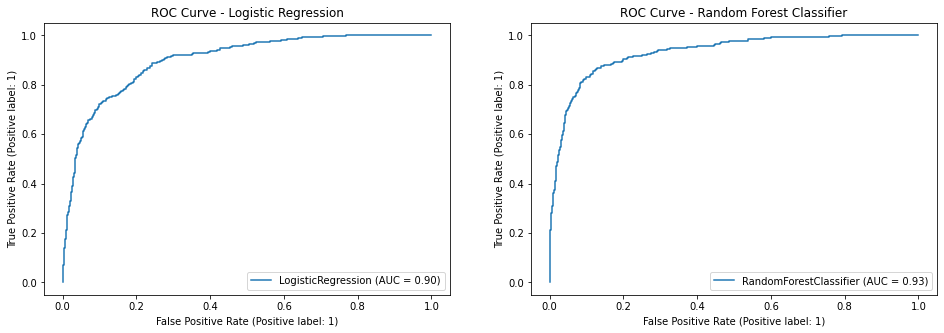

In [12]:
#　Plot ROC curve & AUC
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
models = {'Logistic Regression':lr_best, 'Random Forest Classifier':rf_best}

for n,m in models.items():
    plot_roc_curve(m, X_test, y_test, ax=axes[list(models.keys()).index(n)])
    plt.sca(axes[list(models.keys()).index(n)])
    plt.title('ROC Curve - ' + n)
    
# Random Forest model 的 ROC 曲線與 AUC 值，皆優於 Logistic Regression model

In [13]:
#　Compute AUC score on training & test data for the Random Forest Classifier model
print('Random Forest Classifier - AUC (training set):', roc_auc_score(y_train, rf_best.predict_proba(X_train)[:,1]))
print('Random Forest Classifier - AUC (test set):', roc_auc_score(y_test, rf_best.predict_proba(X_test)[:,1]))

# 通過比較 AUC 分數，可以看到 Random Forest 模型沒有過度擬合數據，因為測試集上的 AUC 分數略低於訓練集。

Random Forest Classifier - AUC (training set): 0.9765634884708277
Random Forest Classifier - AUC (test set): 0.9307934556205923


<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, 'Willingness to book Score Distribution by Converted - Logistic Regression')

Text(0.5, 0, 'Willingness to book Score')

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, 'Willingness to book Score Distribution by Converted - Random Forest Classifier')

Text(0.5, 0, 'Willingness to book Score')

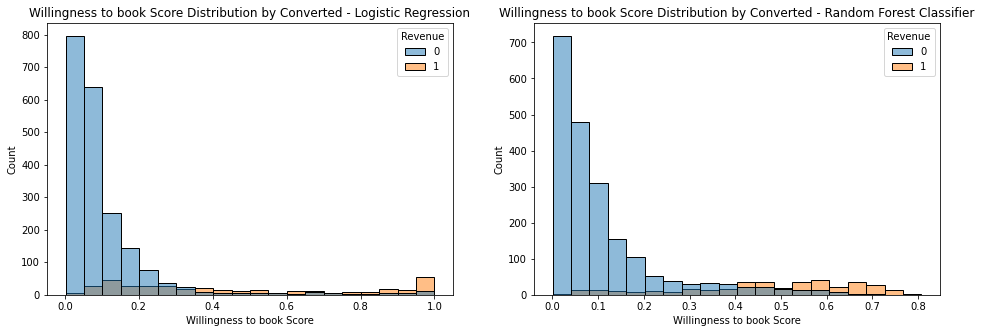

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

for n,m in models.items():
    sns.histplot(x = m.predict_proba(X_test)[:,1], 
                 hue = y_test, 
                 ax = axes[list(models.keys()).index(n)], 
                 bins = 20)
    plt.sca(axes[list(models.keys()).index(n)])
    plt.title('Willingness to book Score Distribution by Converted - ' + n)
    plt.xlabel('Willingness to book Score')

# 模型預測

In [26]:
test = pd.get_dummies(test)
test[np.setdiff1d(X_test.columns,test.columns)]=99
test
# 連續型變數處理
numeric_cols = ['Administrative_Duration','Informational','Informational_Duration','ProductRelated',
                'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
scaler = MinMaxScaler()
test[numeric_cols] = scaler.fit_transform(test[numeric_cols])
test_y_predicted = rf_best.predict(test)
test_y_predicted

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Weekend_1,Browser_0,Browser_12,Browser_2,Month_13,OperatingSystems_2,TrafficType_0,TrafficType_17,TrafficType_6,TrafficType_9
0,0,0.0,0,0.0,12,482.500000,0.020000,0.040000,0.000000,0.0,...,0,99,99,99,99,99,99,99,99,99
1,3,33.0,0,0.0,17,386.416667,0.000000,0.010000,0.000000,0.0,...,0,99,99,99,99,99,99,99,99,99
2,0,0.0,0,0.0,9,154.800000,0.018182,0.030303,20.749351,0.0,...,0,99,99,99,99,99,99,99,99,99
3,5,79.0,1,12.0,54,1603.333333,0.005085,0.025424,0.000000,0.4,...,0,99,99,99,99,99,99,99,99,99
4,2,17.0,1,105.0,9,148.250000,0.020000,0.022000,0.000000,0.0,...,0,99,99,99,99,99,99,99,99,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2,738.0,0,0.0,26,1840.666667,0.008000,0.042000,0.000000,0.0,...,0,99,99,99,99,99,99,99,99,99
896,0,0.0,2,26.5,149,6001.171475,0.004000,0.022011,0.000000,0.0,...,0,99,99,99,99,99,99,99,99,99
897,0,0.0,0,0.0,2,0.000000,0.200000,0.200000,0.000000,0.6,...,0,99,99,99,99,99,99,99,99,99
898,0,0.0,0,0.0,15,263.250000,0.013333,0.040000,0.000000,0.0,...,1,99,99,99,99,99,99,99,99,99


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
# 儲存預測結果
test['Revenue'] = test_y_predicted
test.to_csv('test_final.csv')